In [1]:
import os
import struct
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

fs = 15
col = ['blue', 'red', 'green', 'orange', 'purple', 'dimgrey']
lin = ['-', (0,(3,3,1,3)), (0,(1,1)), (5,(10,3)), (0,(3,3,1,3,1,3)), (0,(5,5))]
lw = 1.5  # plt default: 1.5

''' CHOOSE YOUR TEST ''' #devo ancora fare il 3D....

#TESTdir="HD/Sod/DATA_01/" ; D = 1 ; MHD=False ; q = 5 ; titles=[r"$\rho$", r"$v_x$", r"$v_y$", r"$v_z$", r"$P$"]

#TESTdir="HD/Riemann_2D/DATA_01/" ; D = 2 ; square=True ; no_z=True ; MHD=False ; q = 5 ; titles=[r"$\rho$", r"$v_x$", r"$v_y$", r"$v_z$", r"$P$"]
#TESTdir="HD/Riemann_2D/DATA_03/" ; D = 2 ; square=True ; no_z=True ; MHD=False ; q = 5 ; titles=[r"$\rho$", r"$v_x$", r"$v_y$", r"$v_z$", r"$P$"]

#TESTdir="HD/Isentropic_Vortex/DATA_01/" ; D = 2 ; square=True ; no_z=True ; MHD=False ; q = 5 ; titles=[r"$\rho$", r"$v_x$", r"$v_y$", r"$v_z$", r"$P$"]
#TESTdir="HD/Isentropic_Vortex/DATA_02/" ; D = 2 ; square=True ; no_z=True ; MHD=False ; q = 5 ; titles=[r"$\rho$", r"$v_x$", r"$v_y$", r"$v_z$", r"$P$"]
#TESTdir="HD/Isentropic_Vortex/DATA_03/" ; D = 2 ; square=True ; no_z=True ; MHD=False ; q = 5 ; titles=[r"$\rho$", r"$v_x$", r"$v_y$", r"$v_z$", r"$P$"]
#TESTdir="HD/Isentropic_Vortex/DATA_04/" ; D = 2 ; square=True ; no_z=True ; MHD=False ; q = 5 ; titles=[r"$\rho$", r"$v_x$", r"$v_y$", r"$v_z$", r"$P$"]
#TESTdir="HD/Isentropic_Vortex/DATA_05/" ; D = 2 ; square=True ; no_z=True ; MHD=False ; q = 5 ; titles=[r"$\rho$", r"$v_x$", r"$v_y$", r"$v_z$", r"$P$"]

#TESTdir="HD/Mach_Reflection/DATA_01/" ; D = 2 ; square=False ; ly=256 ; no_z=True ; MHD=False ; q = 5 ; titles=[r"$\rho$", r"$v_x$", r"$v_y$", r"$v_z$", r"$P$"]
#TESTdir="HD/Mach_Reflection/DATA_02/" ; D = 2 ; square=False ; ly=256 ; no_z=True ; MHD=False ; q = 5 ; titles=[r"$\rho$", r"$v_x$", r"$v_y$", r"$v_z$", r"$P$"]

#TESTdir="HD/High_Order/Isentropic_Vortex/DATA_01/" ; D = 2 ; square=True ; no_z=True ; MHD=False ; MHD=False ; q = 5 ; titles=[r"$\rho$", r"$v_x$", r"$v_y$", r"$v_z$", r"$P$"]

#TESTdir="MHD/Orszag_Tang/DATA_01/" ; square=True ; D = 2 ; no_z=True ; MHD=True ; q = 8 ; titles=[r"$\rho$", r"$v_x$", r"$v_y$", r"$v_z$", r"$B_x$", r"$B_y$", r"$B_z$", r"$P$"]
#TESTdir="MHD/Orszag_Tang/DATA_02/" ; square=True ; D = 2 ; no_z=True ; MHD=True ; q = 8 ; titles=[r"$\rho$", r"$v_x$", r"$v_y$", r"$v_z$", r"$B_x$", r"$B_y$", r"$B_z$", r"$P$"]
#TESTdir="MHD/Orszag_Tang/DATA_03/" ; square=True ; D = 2 ; no_z=True ; MHD=True ; q = 9 ; titles=[r"$\rho$", r"$v_x$", r"$v_y$", r"$v_z$", r"$B_x$", r"$B_y$", r"$B_z$", r"$P$", r"?"]
#TESTdir="MHD/Orszag_Tang/DATA_04/" ; square=True ; D = 2 ; no_z=True ; MHD=True ; q = 8 ; titles=[r"$\rho$", r"$v_x$", r"$v_y$", r"$v_z$", r"$B_x$", r"$B_y$", r"$B_z$", r"$P$"]
#TESTdir="MHD/Orszag_Tang/DATA_05/" ; square=True ; D = 2 ; no_z=True ; MHD=True ; q = 10 ; titles=[r"$\rho$", r"$v_x$", r"$v_y$", r"$v_z$", r"$B_x$", r"$B_y$", r"$B_z$", r"$P$", r"?", r"?"]
#TESTdir="MHD/Orszag_Tang/DATA_06/" ; square=True ; D = 2 ; no_z=True ; MHD=True ; q = 10 ; titles=[r"$\rho$", r"$v_x$", r"$v_y$", r"$v_z$", r"$B_x$", r"$B_y$", r"$B_z$", r"$P$", r"?", r"?"]
#TESTdir="MHD/Orszag_Tang/DATA_11/" ; square=True ; D = 2 ; no_z=True ; MHD=True ; q = 10 ; titles=[r"$\rho$", r"$v_x$", r"$v_y$", r"$v_z$", r"$B_x$", r"$B_y$", r"$B_z$", r"$P$", r"?", r"?"]
#TESTdir="MHD/Orszag_Tang/DATA_12/" ; square=True ; D = 2 ; no_z=True ; MHD=True ; q = 10 ; titles=[r"$\rho$", r"$v_x$", r"$v_y$", r"$v_z$", r"$B_x$", r"$B_y$", r"$B_z$", r"$P$", r"?", r"?"]
#TESTdir="MHD/Orszag_Tang/DATA_13/" ; square=True ; D = 2 ; no_z=True ; MHD=True ; q = 10 ; titles=[r"$\rho$", r"$v_x$", r"$v_y$", r"$v_z$", r"$B_x$", r"$B_y$", r"$B_z$", r"$P$", r"?", r"?"]

#TESTdir="MHD/Blast/DATA_01/" ; square=True ; D = 2 ; no_z=True ; MHD=True ; q = 10 ; titles=[r"$\rho$", r"$v_x$", r"$v_y$", r"$v_z$", r"$B_x$", r"$B_y$", r"$B_z$", r"$P$", r"?", r"?"]
#TESTdir="MHD/Blast/DATA_02/" ; square=True ; D = 2 ; no_z=True ; MHD=True ; q = 10 ; titles=[r"$\rho$", r"$v_x$", r"$v_y$", r"$v_z$", r"$B_x$", r"$B_y$", r"$B_z$", r"$P$", r"?", r"?"]
#TESTdir="MHD/Blast/DATA_03/" ; cube=True ; square=True ; D = 3 ; MHD=True ; q = 11 ; titles=[r"$\rho$", r"$v_x$", r"$v_y$", r"$v_z$", r"$B_x$", r"$B_y$", r"$B_z$", r"$P$", r"?", r"?", r"?"]
#TESTdir="MHD/Blast/DATA_04/" ; cube=True  square=True ;; D = 3 ; MHD=True ; q = 9 ; titles=[r"$\rho$", r"$v_x$", r"$v_y$", r"$v_z$", r"$B_x$", r"$B_y$", r"$B_z$", r"$P$", r"?"]
#TESTdir="MHD/Blast/DATA_05/" ; square=True ; D = 2 ; no_z=True ; MHD=True ; q = 10 ; titles=[r"$\rho$", r"$v_x$", r"$v_y$", r"$v_z$", r"$B_x$", r"$B_y$", r"$B_z$", r"$P$", r"?", r"?"]

#TESTdir="MHD/Shock_Cloud/DATA_01/" ; square=True ; D = 2 ; no_z=True ; MHD=True ; q = 10 ; titles=[r"$\rho$", r"$v_x$", r"$v_y$", r"$v_z$", r"$B_x$", r"$B_y$", r"$B_z$", r"$P$", r"?", r"?"]
#TESTdir="MHD/Shock_Cloud/DATA_02/" ; cube=True ; square=True ; D = 3 ; MHD=True ; q = 11 ; titles=[r"$\rho$", r"$v_x$", r"$v_y$", r"$v_z$", r"$B_x$", r"$B_y$", r"$B_z$", r"$P$", r"?", r"?", r"?"]
#TESTdir="MHD/Shock_Cloud/DATA_03/" ; cube=True ; square=True ; D = 3 ; MHD=True ; q = 8 ; titles=[r"$\rho$", r"$v_x$", r"$v_y$", r"$v_z$", r"$B_x$", r"$B_y$", r"$B_z$", r"$P$"]
#TESTdir="MHD/Shock_Cloud/DATA_04/" ; cube=True ; square=True ; D = 3 ; MHD=True ; q = 8 ; titles=[r"$\rho$", r"$v_x$", r"$v_y$", r"$v_z$", r"$B_x$", r"$B_y$", r"$B_z$", r"$P$"]
#TESTdir="MHD/Shock_Cloud/DATA_05/" ; square=True ; D = 2 ; no_z=True ; MHD=True ; q = 10 ; titles=[r"$\rho$", r"$v_x$", r"$v_y$", r"$v_z$", r"$B_x$", r"$B_y$", r"$B_z$", r"$P$", r"?", r"?"]

TESTdir="MHD/Rotor/DATA_01/" ; square=True ; D = 2 ; no_z=True ; MHD=True ; q = 10 ; titles=[r"$\rho$", r"$v_x$", r"$v_y$", r"$v_z$", r"$B_x$", r"$B_y$", r"$B_z$", r"$P$", r"?", r"?"]
#TESTdir="MHD/Rotor/DATA_02/" ; square=True ; D = 2 ; no_z=True ; MHD=True ; q = 10 ; titles=[r"$\rho$", r"$v_x$", r"$v_y$", r"$v_z$", r"$B_x$", r"$B_y$", r"$B_z$", r"$P$", r"?", r"?"]
#TESTdir="MHD/Rotor/DATA_03/" ; square=True ; D = 2 ; no_z=True ; MHD=True ; q = 10 ; titles=[r"$\rho$", r"$v_x$", r"$v_y$", r"$v_z$", r"$B_x$", r"$B_y$", r"$B_z$", r"$P$", r"?", r"?"]

#TESTdir="MHD/Isothermal/Blast/DATA_01/" ; cube=True ; square=True ; D = 3 ; no_z=True ; MHD=True ; q = 10 ; titles=[r"$\rho$", r"$v_x$", r"$v_y$", r"$v_z$", r"$B_x$", r"$B_y$", r"$B_z$", r"$P$", r"?", r"?"]
#TESTdir="MHD/Isothermal/Sod/DATA_01/" ; square=True ; D = 1 ; MHD=True ; q = 10 ; titles=[r"$\rho$", r"$v_x$", r"$v_y$", r"$v_z$", r"$B_x$", r"$B_y$", r"$B_z$", r"$P$", r"?", r"?"]

HOMEdir="/home/mmencagl/programming/gpluto_cpp/Test_Problems/"
dir = HOMEdir + TESTdir


In [5]:
def open_pluto_dbl(name):
    with open(dir + name, 'rb') as fp:   
        if(D==1):
            leng = int(len(fp.read()) / (8*q))
            print("len = %d"%leng)
            a = np.empty((leng,q), dtype=np.float64)
            fp.seek(0)
            for j,i in np.ndindex((q,leng)):
                a[i,j] = np.float64(struct.unpack('d',fp.read(8)))
            return a
        elif(D==2):
            if(square):
                lengx = int(np.sqrt(len(fp.read()) / (8*q)))
                lengy = lengx
            else:
                lengx = int(len(fp.read()) / (8*q*ly))
                lengy = ly
            print("lenX, lenY = %d, %d"%(lengx,lengy))
            a = np.empty((lengx,lengy,q), dtype=np.float64)
            fp.seek(0)
            for k,j,i in np.ndindex((q,lengy,lengx)):
                a[i,j,k] = np.float64(struct.unpack('d',fp.read(8)))
            if(no_z): #supposing no z
                titles[3] = r"$\sqrt{v_x^2+v_y^2}$"
                a[:,:,3] = np.sqrt(a[:,:,1]**2 + a[:,:,2]**2) 
                if(MHD):
                    titles[6] = r"$\sqrt{B_x^2+B_y^2}$"
                    a[:,:,6] = np.sqrt(a[:,:,4]**2 + a[:,:,5]**2) 
            return a
        elif(D==3):
            if(cube):
                lengx = int(np.cbrt(len(fp.read()) / (8*q)))
                lengy = lengx 
                lengz = lengx
            else:
                lengx = int(len(fp.read()) / (8*q*ly*lz))
                lengy = ly
                lengz = lz
            print("lenX, lenY, lenZ = %d, %d, %d"%(lengx,lengy, lengz))
            a = np.empty((lengx,lengy,lengz,q), dtype=np.float64)
            fp.seek(0)
            for k,w,j,i in np.ndindex((q,lengz,lengy,lengx)):
                a[i,j,w,k] = np.float64(struct.unpack('d',fp.read(8)))
            return a
a0 = open_pluto_dbl("data.0000.dbl")
a1 = open_pluto_dbl("data.0001.dbl")

lenX, lenY = 400, 400
lenX, lenY = 400, 400


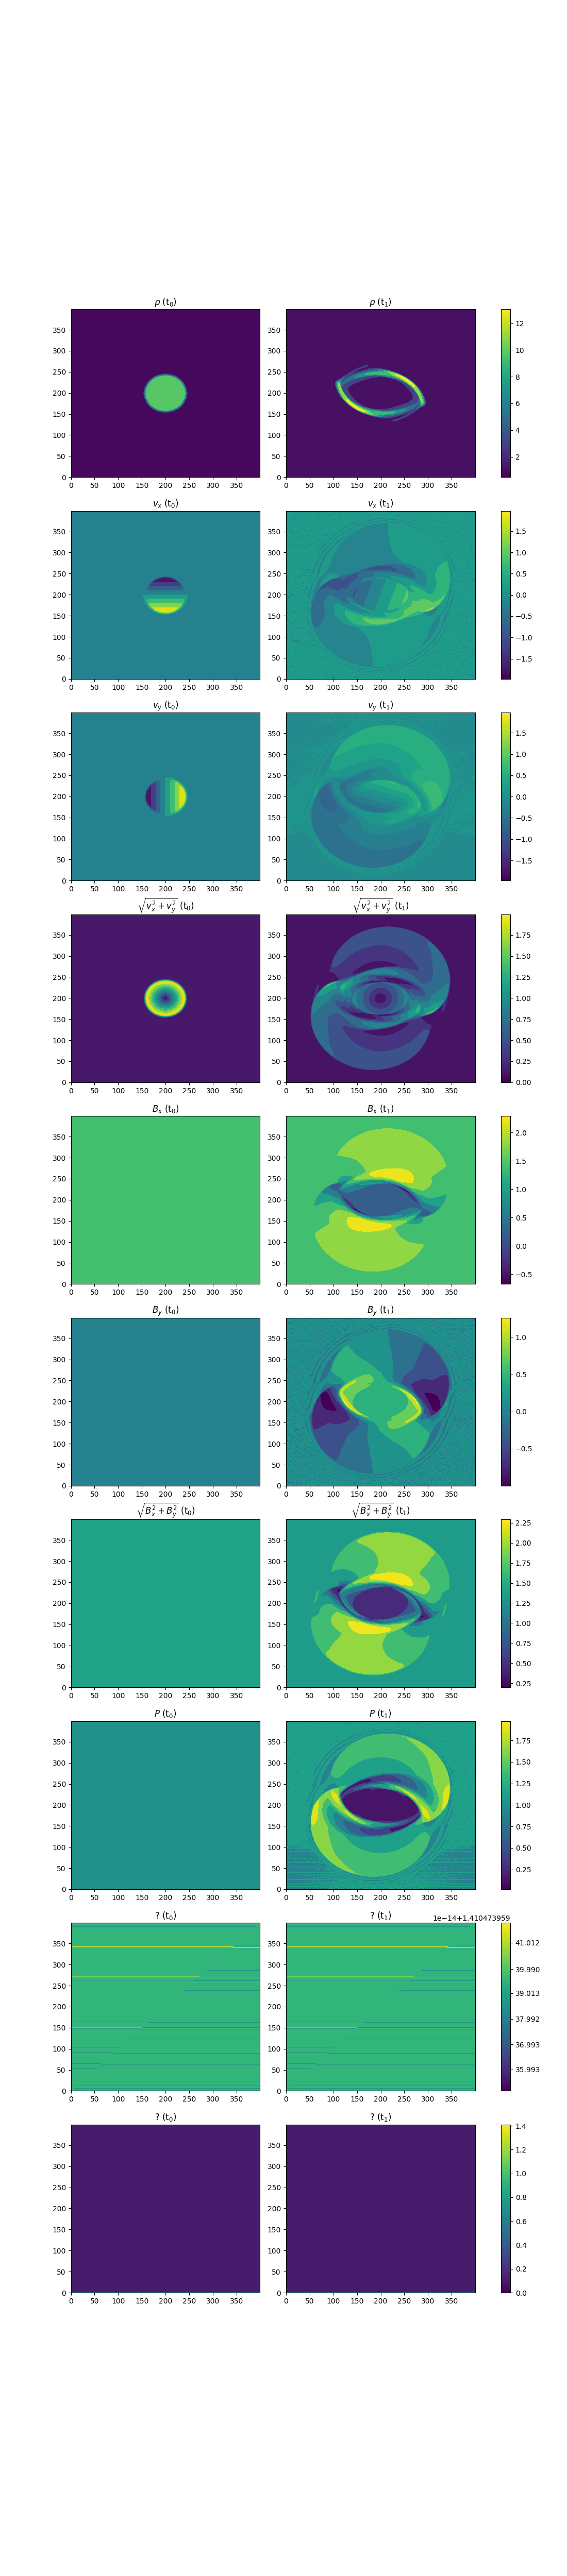

In [11]:
%matplotlib widget

CB="viridis"
def plot_1D(ax1, i, p0, p1):
    #if(i==3): return
    _ = ax1.plot(p0[:,i], color=col[0], linestyle=lin[0], linewidth=lw, label=r"t$_0$")
    _ = ax1.plot(p1[:,i], color=col[1], linestyle=lin[1], linewidth=lw, label=r"t$_1$")
    _ = ax1.legend()
    _ = ax1.set_title(titles[i])
def plot_2D(ax1, ax2, cbar, i, p0, p1):
    vm = min(np.min(p0[:,:,i]), np.min(p1[:,:,i])); vM = max(np.max(p0[:,:,i]), np.max(a1[:,:,i]))
    C = ax1.contourf(p0[:,:,i].T, vmin=vm, vmax=vM, cmap=CB)
    _ = ax2.contourf(p1[:,:,i].T, vmin=vm, vmax=vM, cmap=C.cmap)
    _ = ax1.set_title(titles[i]+r" (t$_0$)")
    _ = ax2.set_title(titles[i]+r" (t$_1$)")
    _ = matplotlib.colorbar.ColorbarBase(cbar, norm=matplotlib.colors.Normalize(vmin=vm, vmax=vM), cmap = C.cmap)
    
_ = plt.close()
if(D==1):
    fig = plt.figure(0, figsize=[5,25])
    gs = fig.add_gridspec(q, 1, width_ratios=[1])
    axs = gs.subplots()
    for i in range(q):
        plot_1D(axs[i], i, a0, a1)
elif(D==2):
    #fig = plt.figure(0, figsize=[11,25]) # square HD
    #fig = plt.figure(0, figsize=[11,15]) # rectangle HD
    fig = plt.figure(0, figsize=[11,50]) # square MHD
    gs = fig.add_gridspec(q, 3, width_ratios=[1,1,0.05])
    axs = gs.subplots()
    for i in range(q):
        plot_2D(axs[i,0],axs[i,1],axs[i,2], i, a0, a1)
elif(D==3):
    fig = plt.figure(0, figsize=[11,50])
    gs = fig.add_gridspec(q, 3, width_ratios=[1,1,0.05])
    axs = gs.subplots()
    dir = 'x' ; ps = 0.5
    if   (dir=='x'): slice = int(len(a0[0,:,:,i])*ps); p0 = a0[slice,:,:,:]; p1 = a1[slice,:,:,:] 
    elif (dir=='y'): slice = int(len(a0[:,0,:,i])*ps); p0 = a0[:,slice,:,:]; p1 = a1[:,slice,:,:] 
    elif (dir=='z'): slice = int(len(a0[:,:,0,i])*ps); p0 = a0[:,:,slice,:]; p1 = a1[:,:,slice,:] 
    for i in range(q):
        plot_2D(axs[i,0],axs[i,1],axs[i,2], i, p0, p1)
_ = plt.show()

Nx = 400
Ny = 400


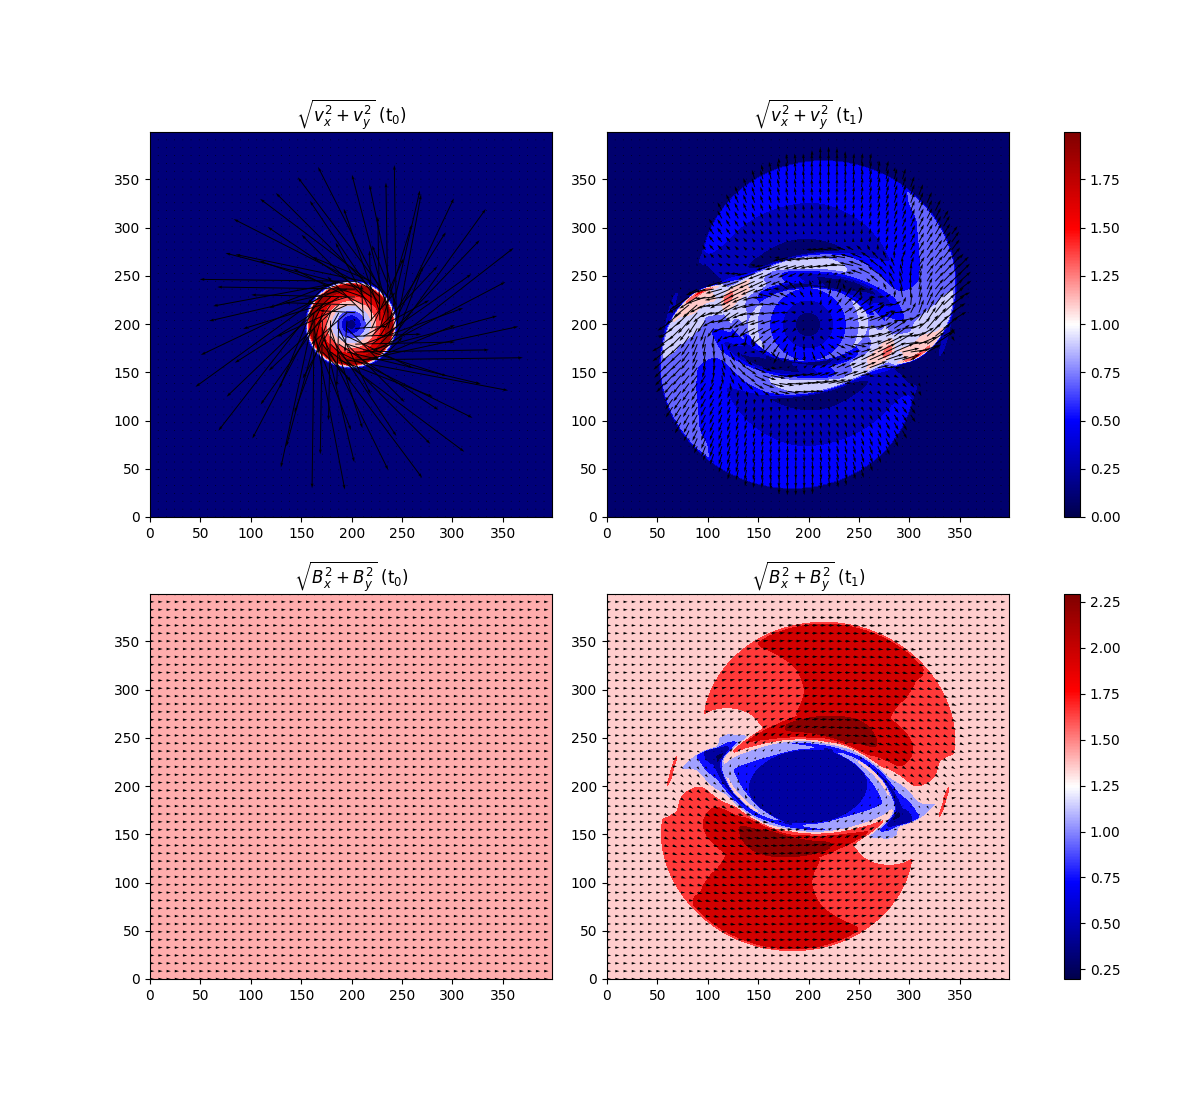

In [7]:
%matplotlib widget

def plot_2d_quiver(ax0, ax1, cbar, i, p0, p1):
    vm = min(np.min(p0[:,:,i]), np.min(p1[:,:,i])); vM = max(np.max(p0[:,:,i]), np.max(p1[:,:,i]))
    C = ax0.contourf(p0[:,:,i].T, vmin=vm, vmax=vM, cmap=CB)
    _ = ax1.contourf(p1[:,:,i].T, vmin=vm, vmax=vM, cmap=C.cmap)
    _ = ax0.quiver(x,y,p0[::sx,::sy,i-2].T,p0[::sx,::sy,i-1].T)
    _ = ax1.quiver(x,y,p1[::sx,::sy,i-2].T,p1[::sx,::sy,i-1].T)
    _ = ax0.set_title(titles[i]+r" (t$_0$)")
    _ = ax1.set_title(titles[i]+r" (t$_1$)")
    _ = matplotlib.colorbar.ColorbarBase(cbar, norm=matplotlib.colors.Normalize(vmin=vm, vmax=vM), cmap = C.cmap)

Nx = len(a0[:,0,0]) ; print("Nx = %d"%Nx)
Ny = len(a0[0,:,0]) ; print("Ny = %d"%Ny)
''' ADJUST sx,sy to change the number of arrows (must be a divisor of Nx,Ny)'''
if(square): sx = 8; sy = sx
else: sx = 32 ; sy = 16
nx = int(Nx/sx)
ny = int(Ny/sy)
x,y = np.meshgrid(np.linspace(0,Nx-1,nx),np.linspace(0,Ny-1,ny))
_ = plt.close()
if(MHD): 
    fig = plt.figure(0, figsize=[12,11])
    gs = fig.add_gridspec(2, 3, width_ratios=[1,1,0.04])
    axs = gs.subplots()
    plot_2d_quiver(axs[0,0], axs[0,1], axs[0,2], 3, a0, a1)
    plot_2d_quiver(axs[1,0], axs[1,1], axs[1,2], 6, a0, a1)
else: 
    fig = plt.figure(0, figsize=[12,5])
    gs = fig.add_gridspec(1, 3, width_ratios=[1,1,0.04]) 
    axs = gs.subplots()
    plot_2d_quiver(axs[0], axs[1], axs[2], 3, a0, a1)
_ = plt.show()

In [4]:
d="/m100/home/userinternal/mmencag1/gpluto_cpp/Test_Problems/ResRMHD/Blast"

d = d.split("/")
print(d)
print(d[-1])
print(d[-2])
print(d[-3])

['', 'm100', 'home', 'userinternal', 'mmencag1', 'gpluto_cpp', 'Test_Problems', 'ResRMHD', 'Blast']
Blast
ResRMHD
Test_Problems
